In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics  import r2_score

In [2]:
!pip install --upgrade kneed
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
ds1=pd.read_csv(r"C:\Users\Lakshita\Desktop\New folder\Training_File.csv")

In [4]:
ds=pd.DataFrame(ds1, columns=['Cement','Blast Furnace Slag _component_2','Fly Ash _component_3','Water_component_4','Superplasticizer_component_5','Coarse Aggregate_component_6','Fine Aggregate_component_7','Age_day','Concrete_compressive _strength'])

In [5]:
ds

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Cement                           1030 non-null   float64
 1   Blast Furnace Slag _component_2  1030 non-null   float64
 2   Fly Ash _component_3             1030 non-null   float64
 3   Water_component_4                1030 non-null   float64
 4   Superplasticizer_component_5     1030 non-null   float64
 5   Coarse Aggregate_component_6     1030 non-null   float64
 6   Fine Aggregate_component_7       1030 non-null   float64
 7   Age_day                          1030 non-null   int64  
 8   Concrete_compressive _strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
ds.describe()

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
ds.isna().sum()

Cement                             0
Blast Furnace Slag _component_2    0
Fly Ash _component_3               0
Water_component_4                  0
Superplasticizer_component_5       0
Coarse Aggregate_component_6       0
Fine Aggregate_component_7         0
Age_day                            0
Concrete_compressive _strength     0
dtype: int64

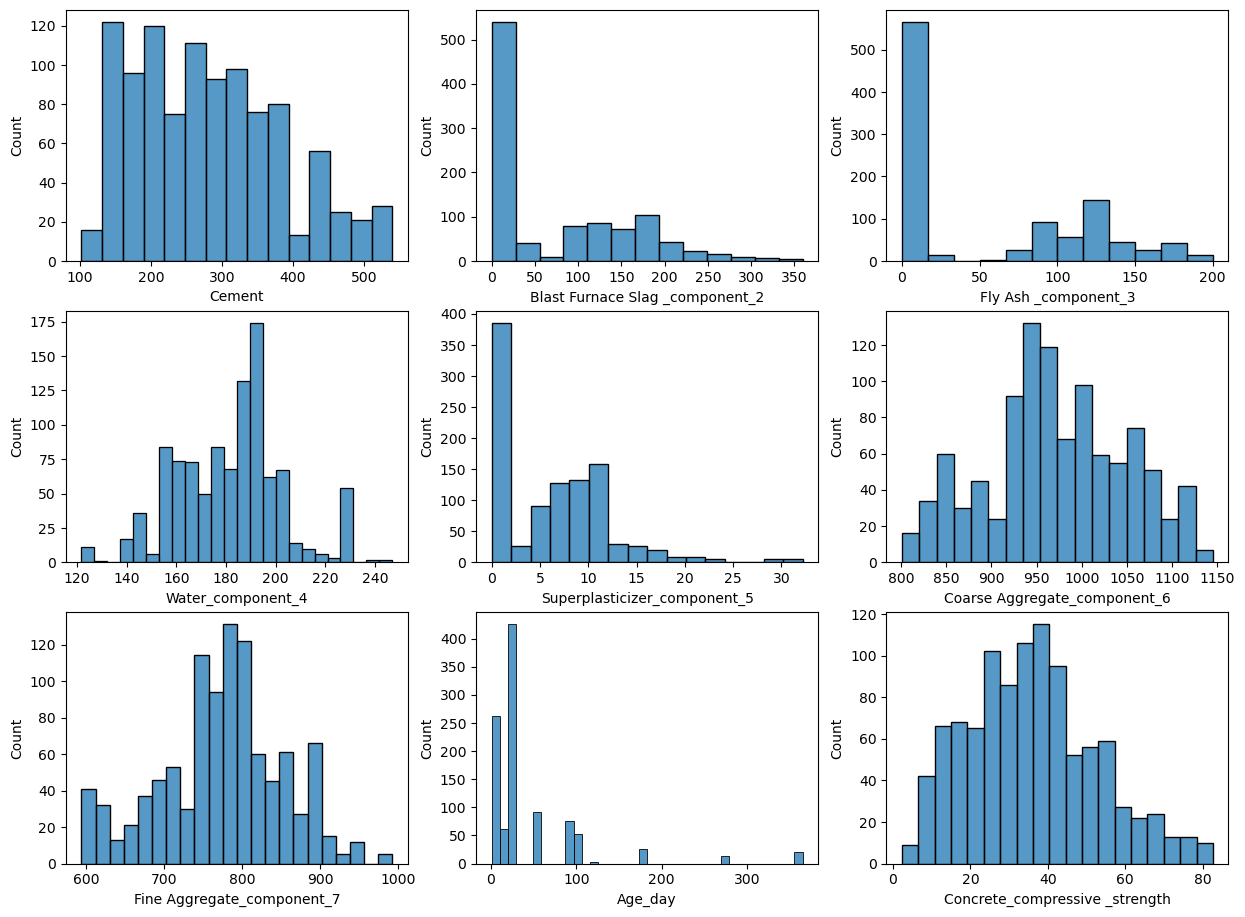

In [9]:
plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in ds.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.histplot(ds[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

In [10]:
ds22=ds1 
for column in ds22.columns:
     ds22[column]+=1
     ds22[column] = np.log(ds22[column])


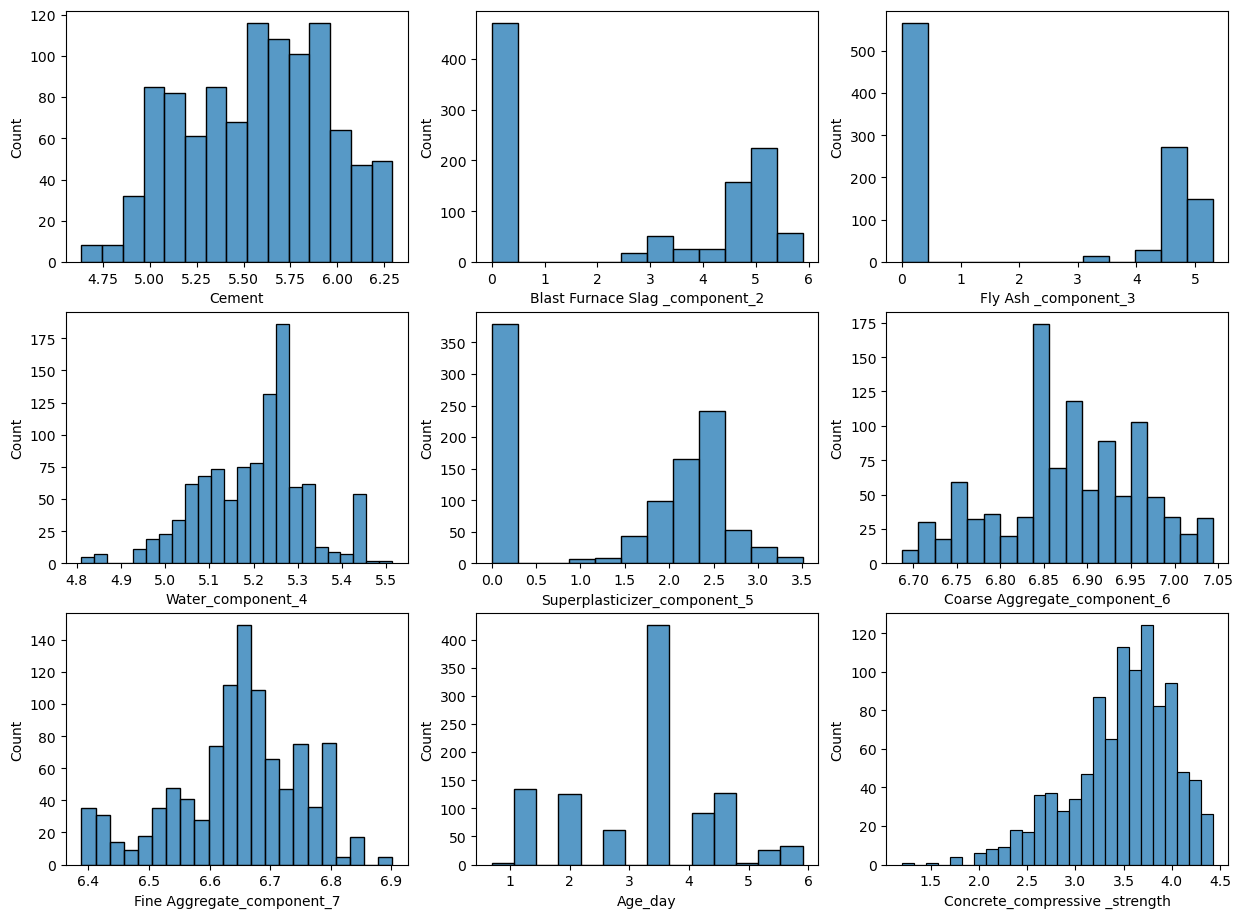

In [11]:
plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in ds22.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.histplot(ds22[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

In [12]:
X = ds22.drop(['Concrete_compressive _strength'],axis=1)
y = ds22['Concrete_compressive _strength']
C = ds22.drop(['Concrete_compressive _strength'],axis=1)

In [13]:
C

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day
0,6.293419,0.000000,0.000000,5.093750,1.252763,6.947937,6.517671,3.367296
1,6.293419,0.000000,0.000000,5.093750,1.252763,6.962243,6.517671,3.367296
2,5.809643,4.966335,0.000000,5.433722,0.000000,6.838405,6.388561,5.602119
3,5.809643,4.966335,0.000000,5.433722,0.000000,6.838405,6.388561,5.902633
4,5.296315,4.893352,0.000000,5.262690,0.000000,6.886940,6.717200,5.888878
...,...,...,...,...,...,...,...,...
1025,5.625461,4.762174,4.514151,5.196285,2.292535,6.769757,6.645481,3.367296
1026,5.778271,0.000000,4.758749,5.283204,2.433613,6.707962,6.702452,3.367296
1027,5.007296,4.944495,4.696837,5.266311,1.960095,6.795034,6.660575,3.367296
1028,5.075799,5.234845,0.000000,5.173887,2.509599,6.898311,6.671906,3.367296


In [14]:
ds

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
0,541.0,0.0,0.0,162.0,2.5,1040.0,676.0,29,79.99
1,541.0,0.0,0.0,162.0,2.5,1055.0,676.0,29,61.89
2,333.5,142.5,0.0,228.0,0.0,932.0,594.0,271,40.27
3,333.5,142.5,0.0,228.0,0.0,932.0,594.0,366,41.05
4,199.6,132.4,0.0,192.0,0.0,978.4,825.5,361,44.30
...,...,...,...,...,...,...,...,...,...
1025,277.4,116.0,90.3,179.6,8.9,870.1,768.3,29,44.28
1026,323.2,0.0,115.6,196.0,10.4,817.9,813.4,29,31.18
1027,149.5,139.4,108.6,192.7,6.1,892.4,780.0,29,23.70
1028,160.1,186.7,0.0,175.6,11.3,989.6,788.9,29,32.77


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

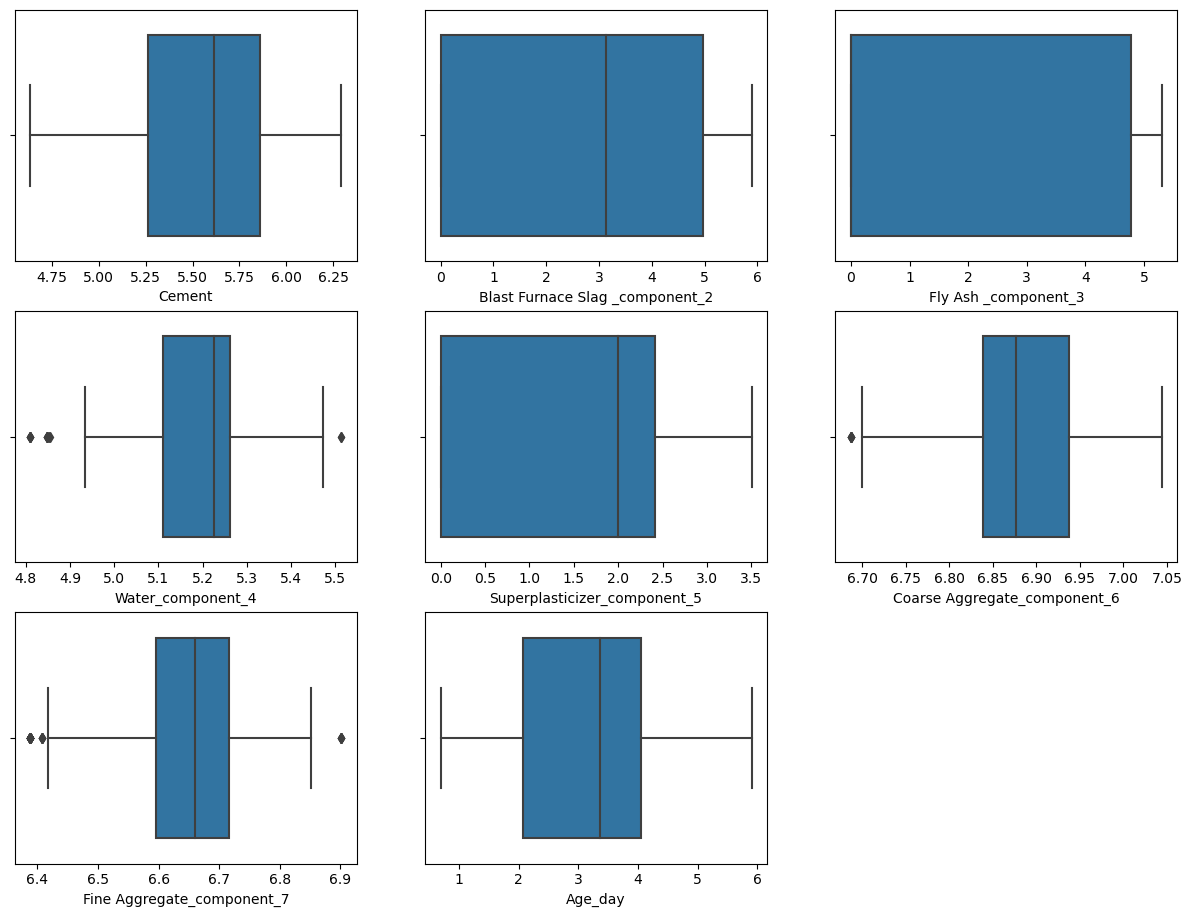

In [15]:
plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4,3,plotnumber)
    #data[column]+=1
    sns.boxplot((X[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

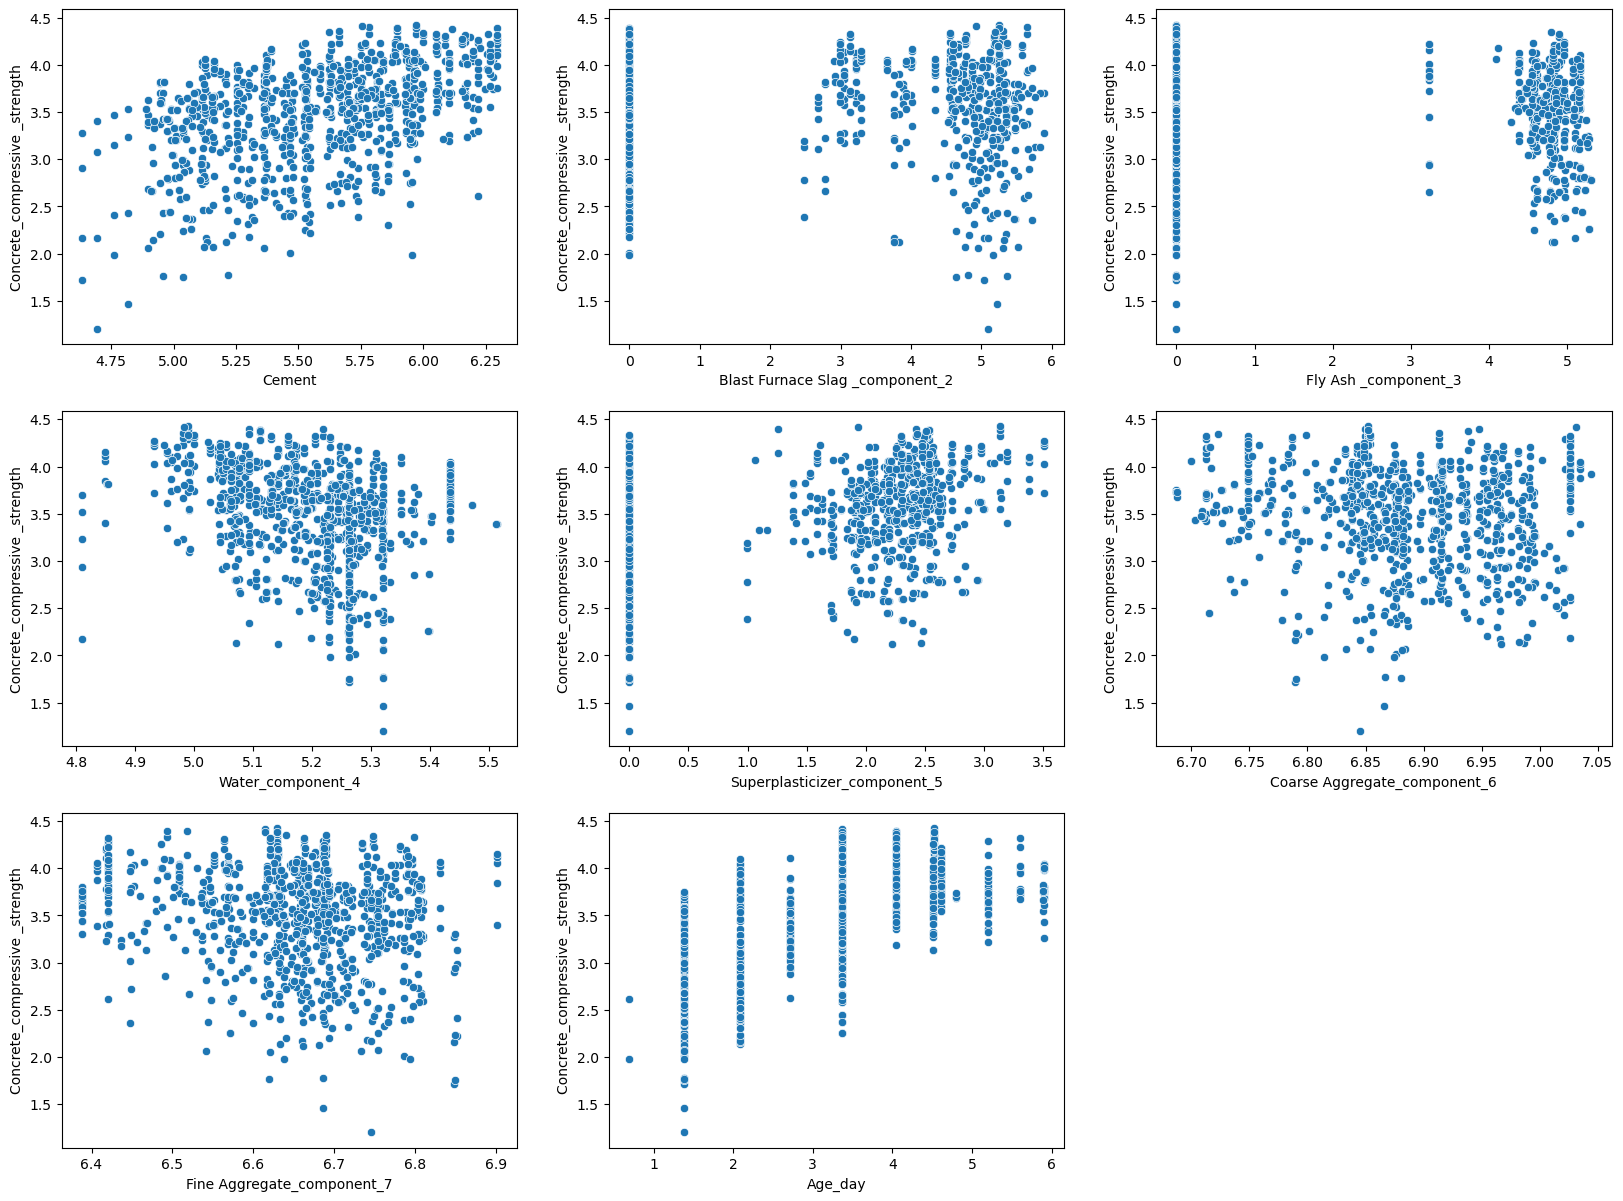

In [16]:
plot.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.scatterplot(x=X[column],y=y)
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

<AxesSubplot:>

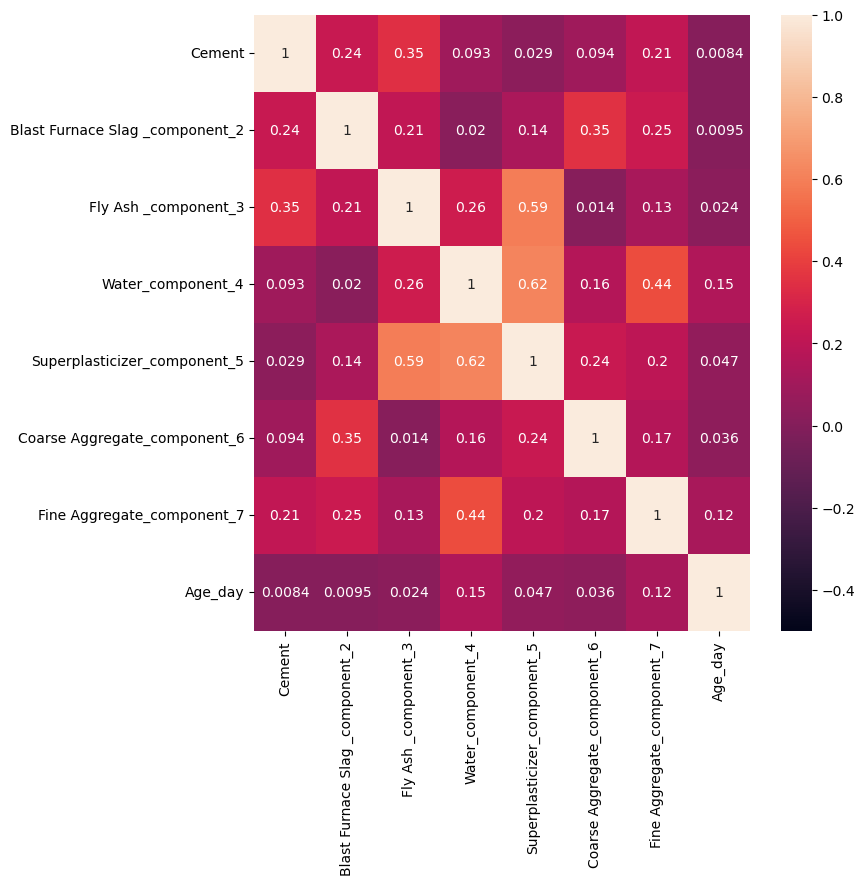

In [17]:
plot.figure(figsize=(8,8))
    #ax = plot.subplot(5,3,plotnumber)
sns.heatmap(X.corr().abs(), vmin = -0.5,vmax = 1,annot=True)

In [18]:
error=[]
from sklearn.preprocessing import RobustScaler

# Create an instance of StandardScaler
scaler = RobustScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(C)

# Convert the scaled data to a DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=['Cement','Blast Furnace Slag _component_2','Fly Ash _component_3','Water_component_4','Superplasticizer_component_5','Coarse Aggregate_component_6','Fine Aggregate_component_7','Age_day'])

# Print the transformed data
print(df_scaled)


        Cement  Blast Furnace Slag _component_2  Fly Ash _component_3  \
0     1.141733                        -0.630952              0.000000   
1     1.141733                        -0.630952              0.000000   
2     0.330246                         0.368418              0.000000   
3     0.330246                         0.368418              0.000000   
4    -0.530809                         0.353732              0.000000   
...        ...                              ...                   ...   
1025  0.021299                         0.327335              0.944059   
1026  0.277624                        -0.630952              0.995213   
1027 -1.015610                         0.364023              0.982265   
1028 -0.900704                         0.422450              0.000000   
1029 -0.075148                         0.298737              0.914589   

      Water_component_4  Superplasticizer_component_5  \
0             -0.872387                     -0.309910   
1        

In [19]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
wcss=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # initializing the KMeans object
  kmeans.fit(X_scaled) # fitting the data to the KMeans Algorithm
  wcss.append(kmeans.inertia_)
kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
s=kn.knee

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [20]:
kmeans = KMeans(n_clusters=s, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X_scaled)  
cluster=y_predict
df_scaled["Cluster"]=cluster
X=df_scaled

In [21]:
z=y
z=pd.DataFrame(z)
cluster = pd.DataFrame(cluster)
z["Cluster"]=cluster

In [22]:
import os
original_path=os.getcwd()
for i in range(s):

# Define the folder path
    folder_path=os.getcwd() + "/" + str(i)
    print(folder_path)

# Check if the folder already exists
    if not os.path.exists(folder_path):
    # If the folder doesn't exist, create it
        os.makedirs(folder_path)

C:\Users\Lakshita\Desktop\New folder/0
C:\Users\Lakshita\Desktop\New folder/1
C:\Users\Lakshita\Desktop\New folder/2
C:\Users\Lakshita\Desktop\New folder/3


In [23]:
# kmeans = KMeans(n_clusters=s, init='k-means++', random_state= 42)  
# y_predict= kmeans.fit_predict(X)
# cluster=y_predict

In [24]:
# df_scaled["Cluster"]=cluster

In [25]:
from sklearn.ensemble import RandomForestRegressor
def randomforest():
    
    

    # Define the model
    model = RandomForestRegressor(random_state=42)

    # Define the grid search parameters
    param_grid = {
    'n_estimators': [10, 50]#, 100, 200],
    ,'max_depth': [None, 5]#, 10, 15],
    ,'min_samples_split': [2]#, 5, 10],
    ,'min_samples_leaf': [1]#, 2, 4],
    ,'max_features': ['auto']#, 'sqrt', 'log2']
    }

    # Define the GridSearchCV object
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1,verbose=2)

    # Fit the model with the GridSearchCV object
    grid_search.fit(X_train_scaled, y_train)

    # Print the best parameters and score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    # Fit the Random Forest Regressor with the best parameters
    best_model_2 = RandomForestRegressor(random_state=42, **grid_search.best_params_)
    best_model_2.fit(X_train_scaled, y_train)
    predict_clf=best_model_2.predict(X_test_scaled)
    global randomForest_error
    randomForest_error = r2_score(y_test,predict_clf)
    return best_model_2


In [26]:
from xgboost import XGBRegressor
def xg_boost():
    param_grid_xgboost = {

    'learning_rate': [0.5, 0.1]#, 0.01, 0.001],
    ,'max_depth': [3, 5]#, 10, 20],
    ,'n_estimators': [10, 50]#, 100, 200]
    }
    xgb1 = XGBRegressor()
    # Creating an object of the Grid Search class
    grid= GridSearchCV(#XGBRegressor(objective='reg:squarederror'),
        xgb1,
                       param_grid_xgboost, verbose=3,cv=5)
    # finding the best parameters
    grid.fit(X_train_scaled, y_train)

    # extracting the best parameters
    learning_rate = grid.best_params_['learning_rate']
    max_depth = grid.best_params_['max_depth']
    n_estimators = grid.best_params_['n_estimators']
    print(learning_rate,max_depth,n_estimators)
    print(grid.best_params_)

  # creating a new model with the best parameters
    xgb =XGBRegressor(
    max_depth=max_depth,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    verbosity=1)#,
    #objective='reg:squarederror')
  # training the mew model
    xgb.fit(X_train_scaled, y_train)
    predict_xgb=xgb.predict(X_test_scaled)
    global xgb_error
    xgb_error = r2_score(y_test,predict_xgb)
    return xgb

In [27]:
from sklearn.tree import DecisionTreeRegressor
def decession_tree():
    param_grid_decisionTree = {'criterion': ['squared_error', 'friedman_mse',],
                                'max_depth': [5, 10]#, 15, 20, 25, 30],
                                ,'max_features': [None, 'sqrt', 'log2'],
                                'max_depth': range(2, 3, 1),
                                'min_samples_split': range(2, 3, 1),
                             'splitter': ['best', 'random']
                              }
    dt=DecisionTreeRegressor()
    # Creating an object of the Grid Search class
    grid = GridSearchCV(dt, param_grid_decisionTree, verbose=3,cv=5)
    # finding the best parameters
    grid.fit(X_train_scaled, y_train)

    # extracting the best parameters
    criterion = grid.best_params_['criterion']
    splitter = grid.best_params_['splitter']
    max_features = grid.best_params_['max_features']
    max_depth  = grid.best_params_['max_depth']
    min_samples_split = grid.best_params_['min_samples_split']

    # creating a new model with the best parameters
    decisionTreeReg = DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_features=max_features,max_depth=max_depth,min_samples_split=min_samples_split)
    # training the mew models
    decisionTreeReg.fit(X_train_scaled, y_train)
    predict_dt=decisionTreeReg.predict(X_test_scaled)
    global dt_error
    dt_error=r2_score(y_test,predict_dt)
    return decisionTreeReg

In [28]:
# from sklearn.preprocessing import MinMaxScaler
model={}
# error=[]

In [29]:
# from sklearn.preprocessing import RobustScaler

# # Create an instance of StandardScaler
# scaler = RobustScaler()

# # Fit and transform the data
# X_scaled = scaler.fit_transform(C)

# # Convert the scaled data to a DataFrame
# df_scaled = pd.DataFrame(X_scaled, columns=['Cement','Blast Furnace Slag _component_2','Fly Ash _component_3','Water_component_4','Superplasticizer_component_5','Coarse Aggregate_component_6','Fine Aggregate_component_7','Age_day'])

# # Print the transformed data
# print(df_scaled)


In [30]:

list_of_clusters=X['Cluster'].unique()    
for i in list_of_clusters:

    cluster_data=X[X['Cluster']==i]
    cluster_data=cluster_data.drop("Cluster",axis=1)
    cluster_data_2=z[z['Cluster']==i]
    cluster_data2=cluster_data_2.drop("Cluster",axis=1)# filter the data for one cluster
    X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(cluster_data, cluster_data_2, test_size=0.2, random_state=42)

    
#     X_train_scaled = scaler.transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
    dtdt=decession_tree()
    xgbxgb=xg_boost()
    rfrf=randomforest()
    error.append(randomForest_error)

    error.append(xgb_error)
    error.append(dt_error)



    if randomForest_error < xgb_error and randomForest_error < dt_error:
        model[i]=dtdt
        pickle.dump(dtdt, open(str(i)+"/"+'model_.pkl', 'wb'))

    elif xgb_error < dt_error and xgb_error < randomForest_error:
        model[i]=xgbxgb



        pickle.dump(xgbxgb, open(str(i)+"/"+'model_.pkl', 'wb'))
    else:
        model[i]=dtdt

        pickle.dump(dtdt, open(str(i)+"/"+'model_.pkl', 'wb'))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.667 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.710 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.709 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.665 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=best;, score=0.626 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=random;, score=0.586 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2, max_features=None, min_samples_split=2, splitter=random;, 

[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.404 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.284 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=10;, score=0.389 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.378 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.423 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.435 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.300 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.396 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=0.401 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=10;, score=0.357 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=10

[CV 4/5] END criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best;, score=0.738 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best;, score=0.803 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=random;, score=0.428 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=random;, score=0.479 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=random;, score=0.534 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=random;, score=0.476 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=random;, score=0.559 total time=   0.0s
[CV 1/5] END criterion=friedman

[CV 3/5] END criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best;, score=0.537 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best;, score=0.236 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best;, score=0.537 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=random;, score=0.558 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=random;, score=0.492 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=random;, score=0.593 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=random;, score=0.556 total time=   0.0s
[CV 5/5] END criterion=friedman_m

[CV 5/5] END criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=random;, score=0.674 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_split=2, splitter=best;, score=0.666 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_split=2, splitter=best;, score=0.676 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_split=2, splitter=best;, score=0.642 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_split=2, splitter=best;, score=0.782 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_split=2, splitter=best;, score=0.638 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_split=2, splitter=random;, score=0.707 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, 

In [31]:
X_train_scaled

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day
867,-0.829926,0.488790,0.000000,-0.071451,0.263907,-1.201769,0.493670,0.000000
860,0.234517,-0.630952,0.990496,-0.555719,0.164085,-0.457117,0.037388,0.000000
385,1.078547,-0.630952,0.000000,-0.555719,-0.073236,-1.248719,0.771573,0.000000
863,0.090015,0.335756,0.000000,-0.290560,0.032270,-0.643720,0.513829,0.000000
143,0.531444,0.284995,0.000000,-2.490640,0.493852,-1.282895,2.017180,0.344139
...,...,...,...,...,...,...,...,...
95,0.740868,0.309920,0.000000,-1.226348,0.356271,-1.282895,1.079197,-0.655861
882,-1.113799,0.354635,0.971296,0.512595,0.032270,-0.555476,-0.288642,0.000000
157,0.475193,0.424901,0.000000,-0.755834,0.220296,-0.245115,-0.257668,0.344139
471,0.821583,0.016779,0.916427,-0.872387,0.220296,-0.010398,-0.755843,0.000000


In [32]:
X_test_scaled

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day
480,0.821583,0.016779,0.916427,-0.872387,0.220296,-0.010398,-0.755843,-0.655861
485,0.584142,-0.018306,0.952367,-1.078296,0.300662,-0.316717,0.673379,0.000000
1025,0.021299,0.327335,0.944059,-0.194720,0.120474,-1.072617,-0.120778,0.000000
965,0.320157,0.403228,0.000000,0.342736,0.085597,-1.780154,0.240604,0.000000
149,0.740868,0.309920,0.000000,-1.226348,0.356271,-1.282895,1.079197,0.344139
1012,0.295177,0.399418,0.000000,-0.402899,0.120474,-0.940536,0.111666,0.000000
861,0.271384,-0.630952,1.016348,-0.107469,0.200101,-1.073773,0.005352,0.000000
946,-1.004427,0.469380,0.000000,-0.335267,0.251909,-1.345656,1.131722,0.000000
80,0.740868,0.309920,0.000000,-1.226348,0.356271,-1.282895,1.079197,-1.008857
396,1.065619,-0.630952,0.000000,-0.872387,0.094595,-1.904949,0.237482,0.000000


In [33]:
model

{2: XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 0: XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, f

In [34]:
C

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day
0,6.293419,0.000000,0.000000,5.093750,1.252763,6.947937,6.517671,3.367296
1,6.293419,0.000000,0.000000,5.093750,1.252763,6.962243,6.517671,3.367296
2,5.809643,4.966335,0.000000,5.433722,0.000000,6.838405,6.388561,5.602119
3,5.809643,4.966335,0.000000,5.433722,0.000000,6.838405,6.388561,5.902633
4,5.296315,4.893352,0.000000,5.262690,0.000000,6.886940,6.717200,5.888878
...,...,...,...,...,...,...,...,...
1025,5.625461,4.762174,4.514151,5.196285,2.292535,6.769757,6.645481,3.367296
1026,5.778271,0.000000,4.758749,5.283204,2.433613,6.707962,6.702452,3.367296
1027,5.007296,4.944495,4.696837,5.266311,1.960095,6.795034,6.660575,3.367296
1028,5.075799,5.234845,0.000000,5.173887,2.509599,6.898311,6.671906,3.367296


In [35]:
ds_pred=pd.read_csv(r"C:\Users\Lakshita\Desktop\New folder\Prediction.csv")

In [36]:
ds_pred

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3
3,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7
4,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28
...,...,...,...,...,...,...,...,...
279,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,7
280,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,28
281,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,90
282,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,180


In [37]:
for column in ds_pred.columns:
     ds_pred[column]+=1
     ds_pred[column] = np.log(ds_pred[column])
    



In [38]:
ds_pred=scaler.transform(ds_pred)

In [39]:
ds2=pd.DataFrame(ds_pred, columns=['Cement','Blast Furnace Slag _component_2','Fly Ash _component_3','Water_component_4','Superplasticizer_component_5','Coarse Aggregate_component_6','Fine Aggregate_component_7','Age_day'])

In [40]:
y_test_predict= kmeans.predict(ds_pred)  

In [41]:
# type(ds_pred)
# ds_pred=pd.DataFrame(ds_pred)
# ds_pred=pd.DataFrame(ds_pred, columns=['Cement','Blast Furnace Slag _component_2','Fly Ash _component_3','Water_component_4','Superplasticizer_component_5','Coarse Aggregate_component_6','Fine Aggregate_component_7','Age_day'])

In [42]:
cluster=y_test_predict
ds2["Cluster"]=cluster

In [43]:
ds2

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Cluster
0,1.141733,-0.630952,0.0,-0.872387,-0.309910,0.721798,-1.188778,0.000000,2
1,1.141733,-0.630952,0.0,-0.872387,-0.309910,0.865874,-1.188778,0.000000,2
2,1.114539,-0.630952,0.0,-1.746814,0.568186,-1.282895,1.141067,-1.008857,1
3,1.114539,-0.630952,0.0,-1.746814,0.568186,-1.282895,1.141067,-0.655861,1
4,1.114539,-0.630952,0.0,-1.746814,0.568186,-1.282895,1.141067,0.000000,1
...,...,...,...,...,...,...,...,...,...
279,-1.118565,0.445423,0.0,0.244166,-0.828457,0.789290,0.288318,-0.655861,0
280,-1.118565,0.445423,0.0,0.244166,-0.828457,0.789290,0.288318,0.000000,0
281,-1.118565,0.445423,0.0,0.244166,-0.828457,0.789290,0.288318,0.582378,0
282,-1.118565,0.445423,0.0,0.244166,-0.828457,0.789290,0.288318,0.932569,0


In [44]:
result=[]
sum=0
l=pd.DataFrame()

list_of_clusters=ds2["Cluster"].unique()    
for i in list_of_clusters:
    folder_path2=original_path+ '/' + str(i)
    os.chdir(folder_path2)
    cluster_data=ds2[ds2["Cluster"]==i]
    print(cluster_data)
    #print(cluster_data)
    cluster_data=cluster_data.drop("Cluster",axis=1)
    #print(cluster_data)
    #ds_pred_2=scaler.transform(cluster_data)
    #print(ds_pred_2)
    ds_pred_2=pd.DataFrame(cluster_data)
    l=pd.concat([l,ds_pred_2],axis=0)
    #print(l)
    with open("model_.pkl", 'rb') as model_file:
        load_model = pickle.load(model_file)
        #print(load_model)

        result_i=load_model.predict(cluster_data)
        #l["Compresive Strength"]=result_i[0]
        
      
    result.append(result_i)
    

       Cement  Blast Furnace Slag _component_2  Fly Ash _component_3  \
0    1.141733                        -0.630952                   0.0   
1    1.141733                        -0.630952                   0.0   
8    0.927024                        -0.630952                   0.0   
9    0.927024                        -0.630952                   0.0   
10   0.927024                        -0.630952                   0.0   
..        ...                              ...                   ...   
263 -0.604685                         0.425957                   0.0   
264 -0.604685                         0.425957                   0.0   
265 -0.604685                         0.425957                   0.0   
266 -0.604685                         0.425957                   0.0   
267 -0.604685                         0.425957                   0.0   

     Water_component_4  Superplasticizer_component_5  \
0            -0.872387                     -0.309910   
1            -0.872387 

In [45]:
ds_pred_2

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day
115,0.411249,-0.630952,0.000000,0.244166,-0.828457,0.789290,0.288318,-1.008857
145,0.213080,-0.630952,0.000000,0.244166,-0.828457,0.031131,0.728510,-1.008857
187,-0.258368,-0.630952,0.953684,0.443181,-0.115366,-0.220652,0.744195,-1.008857
188,-0.258368,-0.630952,0.953684,0.443181,-0.115366,-0.220652,0.744195,-0.335731
189,-0.258368,-0.630952,0.953684,0.443181,-0.115366,-0.220652,0.744195,0.000000
190,-0.258368,-0.630952,0.953684,0.443181,-0.115366,-0.220652,0.744195,0.344139
191,-0.258368,-0.630952,0.953684,0.443181,-0.115366,-0.220652,0.744195,0.635475
242,-0.530809,0.353732,0.000000,0.244166,-0.828457,0.107511,0.478518,-1.008857
243,-0.530809,0.353732,0.000000,0.244166,-0.828457,0.107511,0.478518,-0.655861
244,-0.530809,0.353732,0.000000,0.244166,-0.828457,0.107511,0.478518,0.000000


In [46]:
type(ds_pred_2)

pandas.core.frame.DataFrame

In [47]:
type(l)

pandas.core.frame.DataFrame

In [48]:
ds_pred_2

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day
115,0.411249,-0.630952,0.000000,0.244166,-0.828457,0.789290,0.288318,-1.008857
145,0.213080,-0.630952,0.000000,0.244166,-0.828457,0.031131,0.728510,-1.008857
187,-0.258368,-0.630952,0.953684,0.443181,-0.115366,-0.220652,0.744195,-1.008857
188,-0.258368,-0.630952,0.953684,0.443181,-0.115366,-0.220652,0.744195,-0.335731
189,-0.258368,-0.630952,0.953684,0.443181,-0.115366,-0.220652,0.744195,0.000000
190,-0.258368,-0.630952,0.953684,0.443181,-0.115366,-0.220652,0.744195,0.344139
191,-0.258368,-0.630952,0.953684,0.443181,-0.115366,-0.220652,0.744195,0.635475
242,-0.530809,0.353732,0.000000,0.244166,-0.828457,0.107511,0.478518,-1.008857
243,-0.530809,0.353732,0.000000,0.244166,-0.828457,0.107511,0.478518,-0.655861
244,-0.530809,0.353732,0.000000,0.244166,-0.828457,0.107511,0.478518,0.000000


In [49]:
l

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day
0,1.141733,-0.630952,0.0,-0.872387,-0.309910,0.721798,-1.188778,0.000000
1,1.141733,-0.630952,0.0,-0.872387,-0.309910,0.865874,-1.188778,0.000000
8,0.927024,-0.630952,0.0,1.374544,-0.828457,-0.381274,-2.267642,-0.655861
9,0.927024,-0.630952,0.0,1.374544,-0.828457,-0.381274,-2.267642,0.000000
10,0.927024,-0.630952,0.0,1.374544,-0.828457,-0.381274,-2.267642,0.582378
...,...,...,...,...,...,...,...,...
279,-1.118565,0.445423,0.0,0.244166,-0.828457,0.789290,0.288318,-0.655861
280,-1.118565,0.445423,0.0,0.244166,-0.828457,0.789290,0.288318,0.000000
281,-1.118565,0.445423,0.0,0.244166,-0.828457,0.789290,0.288318,0.582378
282,-1.118565,0.445423,0.0,0.244166,-0.828457,0.789290,0.288318,0.932569


In [50]:
result[0][1][0]

4.180975

In [51]:
result1=[]
for i in range(len(result)):
    z=len(result[i])
    for j in range(len(result[i])):
        #result([i][j])
        result1.append(result[i][j][0])

In [52]:
ds_pred_2=pd.DataFrame(l, columns=['Cement','Blast Furnace Slag _component_2','Fly Ash _component_3','Water_component_4','Superplasticizer_component_5','Coarse Aggregate_component_6','Fine Aggregate_component_7','Age_day'])

In [53]:
type(l)

pandas.core.frame.DataFrame

In [54]:
l.columns =['Cement','Blast Furnace Slag _component_2','Fly Ash _component_3','Water_component_4','Superplasticizer_component_5','Coarse Aggregate_component_6','Fine Aggregate_component_7','Age_day']

In [55]:
l["Concrete_compressive _strength"]=result1

In [56]:
l

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
0,1.141733,-0.630952,0.0,-0.872387,-0.309910,0.721798,-1.188778,0.000000,4.249443
1,1.141733,-0.630952,0.0,-0.872387,-0.309910,0.865874,-1.188778,0.000000,4.180975
8,0.927024,-0.630952,0.0,1.374544,-0.828457,-0.381274,-2.267642,-0.655861,3.505777
9,0.927024,-0.630952,0.0,1.374544,-0.828457,-0.381274,-2.267642,0.000000,3.722343
10,0.927024,-0.630952,0.0,1.374544,-0.828457,-0.381274,-2.267642,0.582378,3.737375
...,...,...,...,...,...,...,...,...,...
279,-1.118565,0.445423,0.0,0.244166,-0.828457,0.789290,0.288318,-0.655861,2.519624
280,-1.118565,0.445423,0.0,0.244166,-0.828457,0.789290,0.288318,0.000000,3.408657
281,-1.118565,0.445423,0.0,0.244166,-0.828457,0.789290,0.288318,0.582378,3.710032
282,-1.118565,0.445423,0.0,0.244166,-0.828457,0.789290,0.288318,0.932569,3.722223
